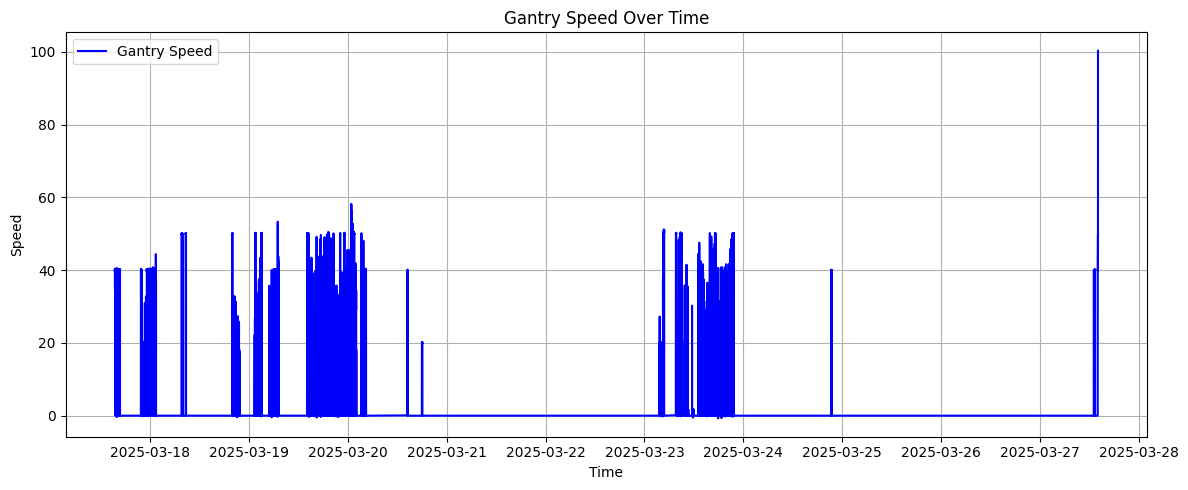

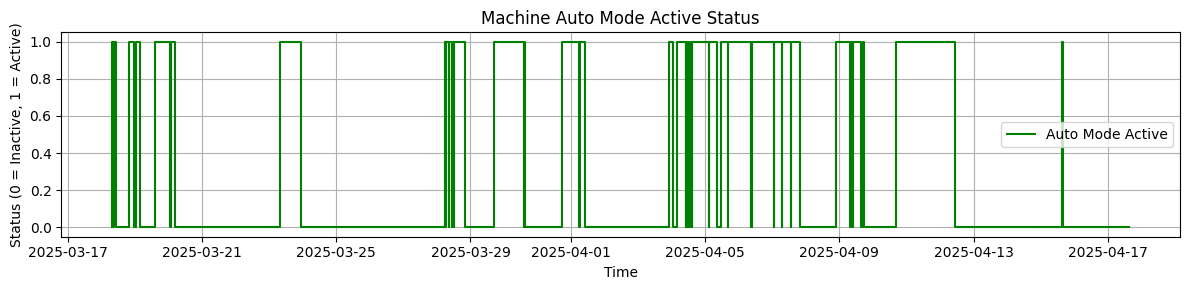

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the file
file_path = r"C:\Users\User\Downloads\ER 04 gantry.csv"
df_raw = pd.read_csv(file_path, header=None)

# Set proper column names
df_raw.columns = df_raw.iloc[0]
df = df_raw[1:].reset_index(drop=True)

# Convert Time to datetime and Value to numeric
df["Time"] = pd.to_datetime(df["Time"], errors='coerce')
df["Value"] = pd.to_numeric(df["Value"], errors='coerce')

# Separate data sources
gantry_df = df[df["Data Source"] == r"\\pisystem-malaysia\TRMT_ER1040ML04_SIT"].copy()
auto_mode_df = df[df["Data Source"] == r"\\pisystem-malaysia\TRMT_ER1040ML04_BM1_IS01_YIT_AUTO_MOD"].copy()

# Sort by time (optional)
gantry_df = gantry_df.sort_values("Time")
auto_mode_df = auto_mode_df.sort_values("Time")

# Plot Gantry Speed
plt.figure(figsize=(12, 5))
plt.plot(gantry_df["Time"], gantry_df["Value"], label="Gantry Speed", color="blue")
plt.title("Gantry Speed Over Time")
plt.xlabel("Time")
plt.ylabel("Speed")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Plot Machine Auto Mode Status
plt.figure(figsize=(12, 3))
plt.step(auto_mode_df["Time"], auto_mode_df["Value"], label="Auto Mode Active", where='post', color="green")
plt.title("Machine Auto Mode Active Status")
plt.xlabel("Time")
plt.ylabel("Status (0 = Inactive, 1 = Active)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [2]:
import pandas as pd

# Load file
file_path = r"C:\Users\User\Downloads\ER 04 gantry.csv"
df_raw = pd.read_csv(file_path, header=None)

# Set column headers
df_raw.columns = df_raw.iloc[0]
df = df_raw[1:].reset_index(drop=True)

# Convert datatypes
df["Time"] = pd.to_datetime(df["Time"], errors='coerce')
df["Value"] = pd.to_numeric(df["Value"], errors='coerce')

# Drop rows with missing Time
df = df.dropna(subset=["Time"])

# Separate by data source
gantry_df = df[df["Data Source"] == r"\\pisystem-malaysia\TRMT_ER1040ML04_SIT"].copy()
auto_mode_df = df[df["Data Source"] == r"\\pisystem-malaysia\TRMT_ER1040ML04_BM1_IS01_YIT_AUTO_MOD"].copy()

# Drop rows with null Time again just to be safe
gantry_df = gantry_df.dropna(subset=["Time"]).sort_values("Time").reset_index(drop=True)
auto_mode_df = auto_mode_df.dropna(subset=["Time"]).sort_values("Time").reset_index(drop=True)

# Merge asof
merged_df = pd.merge_asof(gantry_df, auto_mode_df, on="Time", direction="backward", suffixes=("_gantry", "_auto"))

# Rename for clarity
merged_df.rename(columns={"Value_gantry": "Gantry Speed", "Value_auto": "Auto Mode"}, inplace=True)

# Filter: Auto Mode = 1 and Gantry Speed > 50
condition_df = merged_df[(merged_df["Auto Mode"] == 1) & (merged_df["Gantry Speed"] > 50)]

# Export to CSV
condition_df.to_csv(r"C:\Users\User\Downloads\gantry_auto_mode_active_speed_gt_50.csv", index=False)

print("✅ Exported filtered results to CSV.")


✅ Exported filtered results to CSV.


In [3]:
pip install pandas seaborn matplotlib


Note: you may need to restart the kernel to use updated packages.


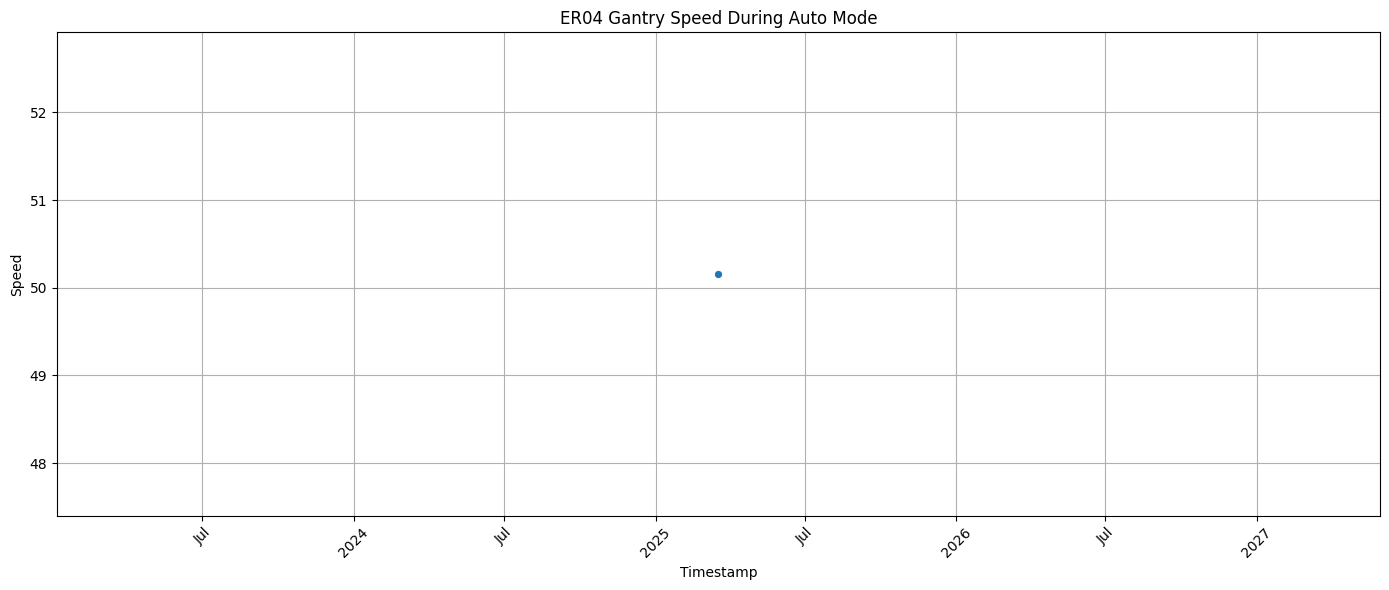

Filtered data saved to: C:\Users\User\Downloads\ER04_AutoMode_Speed.csv


In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Load CSV
file_path = r"C:\Users\User\Downloads\ER 04 gantry.csv"
df = pd.read_csv(file_path)

# Parse 'Time' column with mixed formats
df['Time'] = pd.to_datetime(df['Time'], format='mixed', errors='coerce')

# Convert values to numeric (handle errors)
df['Value'] = pd.to_numeric(df['Value'], errors='coerce')

# Drop rows with missing data
df.dropna(subset=['Time', 'Value'], inplace=True)

# Separate data based on data source
speed_df = df[df['Data Source'].str.contains('SIT')].copy()
auto_df = df[df['Data Source'].str.contains('AUTO_MOD')].copy()

# Rename columns
speed_df.rename(columns={'Value': 'Speed'}, inplace=True)
auto_df.rename(columns={'Value': 'Auto_Mode'}, inplace=True)

# Sort both by time
speed_df.sort_values('Time', inplace=True)
auto_df.sort_values('Time', inplace=True)

# Merge on nearest timestamps (within 15 seconds)
merged_df = pd.merge_asof(
    speed_df, auto_df,
    on='Time',
    direction='nearest',
    tolerance=pd.Timedelta(seconds=15)
)

# Filter only when Auto_Mode == 1 (machine in auto mode)
auto_only_df = merged_df[merged_df['Auto_Mode'] == 1]

# Plot speed over time
plt.figure(figsize=(14, 6))
sns.lineplot(data=auto_only_df, x='Time', y='Speed', marker='o')
plt.title("ER04 Gantry Speed During Auto Mode")
plt.xlabel("Timestamp")
plt.ylabel("Speed")
plt.grid(True)

# Improve date formatting on x-axis
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(ax.xaxis.get_major_locator()))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# (Optional) Save filtered dataset to CSV
output_path = r"C:\Users\User\Downloads\ER04_AutoMode_Speed.csv"
auto_only_df.to_csv(output_path, index=False)
print(f"Filtered data saved to: {output_path}")


Entries where Gantry Speed > 50 (while in Auto Mode):
               Time     Speed  AutoMode
2025-03-18 07:39:45 50.004997         1
2025-03-18 07:40:00 50.125000         1
2025-03-18 07:41:30 50.149998         1
2025-03-18 07:43:20 50.020000         1
2025-03-18 07:45:00 50.164997         1
2025-03-18 07:46:15 50.079998         1
2025-03-18 07:46:35 50.154999         1
2025-03-18 07:48:50 50.024998         1
2025-03-18 07:49:34 50.024998         1
2025-03-18 07:53:14 50.059998         1
2025-03-18 08:38:05 50.139999         1
2025-03-18 08:38:45 50.039997         1
2025-03-18 08:40:30 50.160000         1
2025-03-18 08:40:45 50.029999         1
2025-03-18 08:41:55 50.224998         1
2025-03-18 08:43:10 50.164997         1
2025-03-18 08:43:35 50.235001         1
2025-03-18 19:55:05 50.075001         1
2025-03-18 19:55:15 50.114998         1
2025-03-18 19:55:45 50.119999         1
2025-03-18 19:58:15 50.039997         1
2025-03-18 19:59:55 50.044998         1
2025-03-18 20:00:45 50.215

C:\Users\User\AppData\Local\Temp\ipykernel_6364\2940871110.py:33: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_speed['Time'] = df_speed['Time'].dt.floor('S')
C:\Users\User\AppData\Local\Temp\ipykernel_6364\2940871110.py:38: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_auto = df_auto.resample('1S').ffill()      # resample to 1-second frequency and forward-fill to carry the last value
C:\Users\User\AppData\Local\Temp\ipykernel_6364\2940871110.py:42: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].me

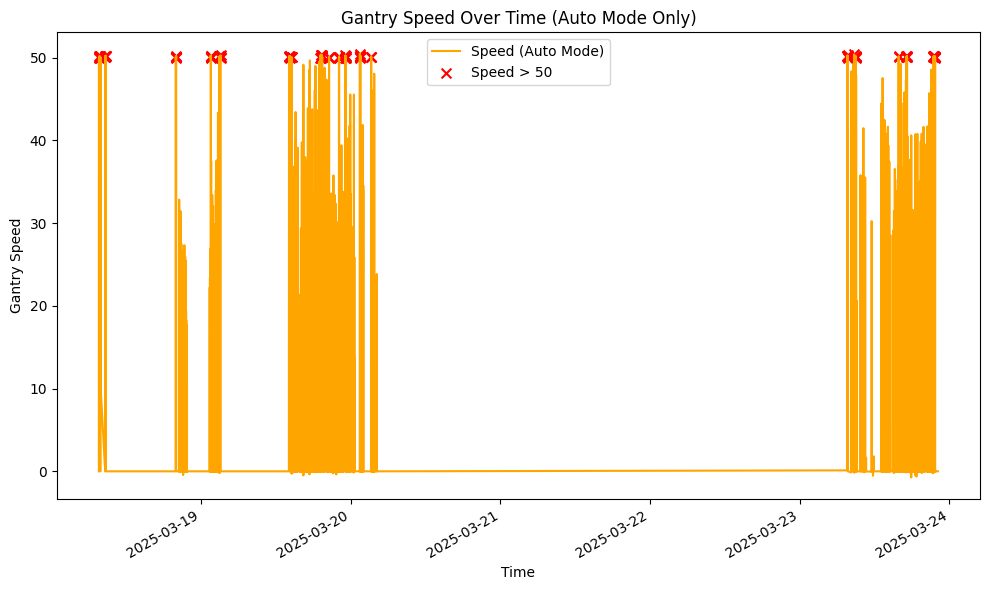

In [5]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt

# Enable inline plotting for Jupyter (so plots appear in the notebook)
%matplotlib inline

# Load the CSV file
file_path = r"C:\Users\User\Downloads\ER 04 gantry.csv"
df = pd.read_csv(file_path)

# Convert 'Time' to datetime objects and 'Value' to numeric (coerce errors like 'Comm Fail' to NaN)
df['Time'] = pd.to_datetime(df['Time'], errors='coerce', format='mixed')
df['Value'] = pd.to_numeric(df['Value'], errors='coerce')


# Split the data into two DataFrames based on 'Data Source'
# - Gantry Speed data (Data Source contains 'TRMT_ER1040ML04_SIT')
# - Auto Mode data (Data Source contains 'TRMT_ER1040ML04_BM1_IS01_YIT_AUTO_MOD')
df_speed = df[df['Data Source'].str.contains('TRMT_ER1040ML04_SIT')].copy()
df_auto = df[df['Data Source'].str.contains('TRMT_ER1040ML04_BM1_IS01_YIT_AUTO_MOD')].copy()

# Rename 'Value' column to meaningful names for each dataset
df_speed.rename(columns={'Value': 'Speed'}, inplace=True)
df_auto.rename(columns={'Value': 'AutoMode'}, inplace=True)

# Drop the 'Data Source' column as it's no longer needed in the separate DataFrames
df_speed.drop(columns='Data Source', inplace=True)
df_auto.drop(columns='Data Source', inplace=True)

# Align data using timestamps
# Round down (floor) the speed timestamps to the nearest second to align with Auto Mode timestamps
df_speed['Time'] = df_speed['Time'].dt.floor('S')

# Set the time as index for auto mode data and resample to 1-second intervals, forward-filling the AutoMode value
df_auto.set_index('Time', inplace=True)
df_auto = df_auto.sort_index()                # ensure the index is sorted by time before resampling
df_auto = df_auto.resample('1S').ffill()      # resample to 1-second frequency and forward-fill to carry the last value
df_auto = df_auto.reset_index()               # reset the index so 'Time' is a column again

# If the first AutoMode value is NaN (e.g., if recording started mid-operation), fill it assuming Auto Mode was 0 (off)
df_auto['AutoMode'].fillna(0, inplace=True)
# Convert AutoMode to integer type (0/1)
df_auto['AutoMode'] = df_auto['AutoMode'].astype(int)

# Merge the speed and auto mode DataFrames on 'Time'
merged_df = pd.merge(df_speed, df_auto, on='Time', how='left')

# After merging, forward-fill any remaining NaN AutoMode values (in case speed readings extend beyond last auto record)
merged_df.sort_values('Time', inplace=True)  # sort by time before filling
merged_df['AutoMode'] = merged_df['AutoMode'].fillna(method='ffill').fillna(0).astype(int)

# Save the full merged dataset to CSV (for use in PowerBI or other analysis)
output_full_path = r"C:\Users\User\Downloads\ER04_Gantry_Merged_For_PowerBI.csv"
merged_df.to_csv(output_full_path, index=False)

# Filter and display entries where Gantry Speed > 50 while in Auto Mode (AutoMode == 1)
high_speed_auto = merged_df[(merged_df['Speed'] > 50) & (merged_df['AutoMode'] == 1)]
print("Entries where Gantry Speed > 50 (while in Auto Mode):")
print(high_speed_auto.to_string(index=False))  # print the filtered DataFrame without index

# Save the high-speed (Auto Mode) entries to a separate CSV file
output_highspeed_path = r"C:\Users\User\Downloads\ER04_HighSpeed_AutoMode.csv"
high_speed_auto.to_csv(output_highspeed_path, index=False)

# Plot Gantry Speed over time for Auto Mode only, highlighting points where speed > 50
plt.figure(figsize=(10, 6))
# Plot the speed (y-axis) over time (x-axis) for periods when Auto Mode is 1
auto_mode_speed = merged_df[merged_df['AutoMode'] == 1]
plt.plot(auto_mode_speed['Time'], auto_mode_speed['Speed'], label='Speed (Auto Mode)', color='orange')
# Highlight the points where speed > 50 with red 'x' markers
plt.scatter(high_speed_auto['Time'], high_speed_auto['Speed'], color='red', marker='x', s=50, label='Speed > 50')

# Add title and labels
plt.title('Gantry Speed Over Time (Auto Mode Only)')
plt.xlabel('Time')
plt.ylabel('Gantry Speed')
plt.legend()

# Improve x-axis date formatting and layout
plt.gcf().autofmt_xdate()  # rotate and format the date labels on x-axis for readability
plt.tight_layout()
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_6364\4067463148.py:22: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_speed['Time'] = df_speed['Time'].dt.floor('S')
C:\Users\User\AppData\Local\Temp\ipykernel_6364\4067463148.py:26: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_auto = df_auto.resample('1S').ffill()
C:\Users\User\AppData\Local\Temp\ipykernel_6364\4067463148.py:32: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_df['Auto_Mode'] = merged_df['Auto_Mode'].fillna(method='ffill').fillna(0).astype(int)


🔵 Auto Mode Speed Stats:
count    1991.000000
mean       13.772034
std        18.566256
min        -0.735000
25%         0.000000
50%         0.005000
75%        27.352499
max        50.504997
Name: Speed, dtype: float64

🟠 Manual Mode Speed Stats:
count    1609.000000
mean       26.522507
std        17.049703
min        -0.455000
25%        13.014999
50%        35.489998
75%        40.040001
max       100.299995
Name: Speed, dtype: float64


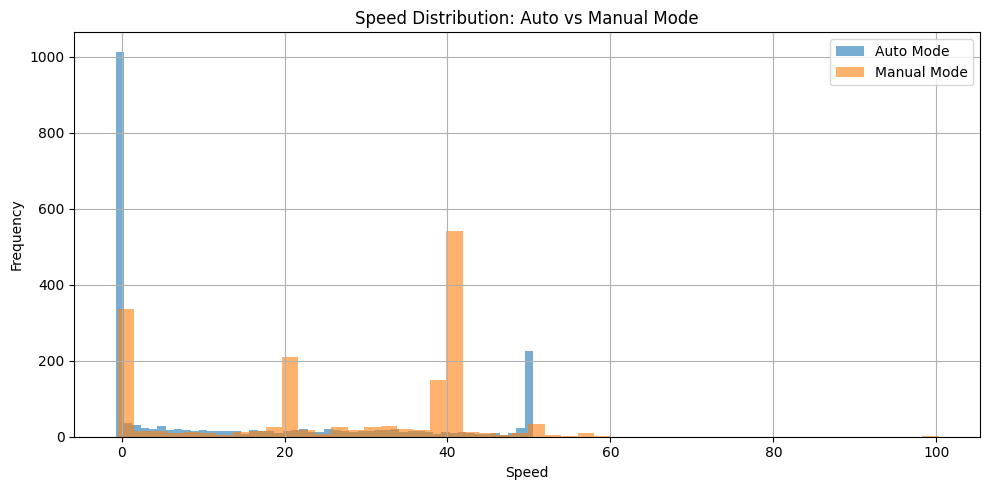

⚠️ Found 0 entries with Speed > 105, removing them...


In [6]:
# 📦 Import required libraries
import pandas as pd
import matplotlib.pyplot as plt

# 🗂️ Load the CSV from your local path
file_path = r"C:\Users\User\Downloads\ER 04 gantry.csv"
df = pd.read_csv(file_path)

# 🧼 Clean and convert columns
df['Time'] = pd.to_datetime(df['Time'], errors='coerce', format='mixed')
df['Value'] = pd.to_numeric(df['Value'], errors='coerce')

# 🧪 Split based on 'Data Source'
df_speed = df[df['Data Source'].str.contains('TRMT_ER1040ML04_SIT')].copy()
df_auto = df[df['Data Source'].str.contains('TRMT_ER1040ML04_BM1_IS01_YIT_AUTO_MOD')].copy()

# ✏️ Rename columns
df_speed.rename(columns={'Value': 'Speed'}, inplace=True)
df_auto.rename(columns={'Value': 'Auto_Mode'}, inplace=True)

# 🕒 Round Speed timestamps to seconds
df_speed['Time'] = df_speed['Time'].dt.floor('S')

# 🕒 Resample Auto Mode to 1-second intervals
df_auto.set_index('Time', inplace=True)
df_auto = df_auto.resample('1S').ffill()
df_auto['Auto_Mode'] = df_auto['Auto_Mode'].fillna(0).astype(int)
df_auto.reset_index(inplace=True)

# 🔗 Merge speed and auto mode data
merged_df = pd.merge(df_speed, df_auto, on='Time', how='left')
merged_df['Auto_Mode'] = merged_df['Auto_Mode'].fillna(method='ffill').fillna(0).astype(int)

# ✅ Separate Auto and Manual Mode Data
auto_df = merged_df[merged_df['Auto_Mode'] == 1]
manual_df = merged_df[merged_df['Auto_Mode'] == 0]

# 💾 Save to CSV
auto_path = r"C:\Users\User\Downloads\ER04_Gantry_AutoMode.csv"
manual_path = r"C:\Users\User\Downloads\ER04_Gantry_ManualMode.csv"
auto_df.to_csv(auto_path, index=False)
manual_df.to_csv(manual_path, index=False)

# 📊 Descriptive stats
print("🔵 Auto Mode Speed Stats:")
print(auto_df['Speed'].describe())
print("\n🟠 Manual Mode Speed Stats:")
print(manual_df['Speed'].describe())

# (Optional) Plot Comparison
plt.figure(figsize=(10, 5))
plt.hist(auto_df['Speed'], bins=50, alpha=0.6, label='Auto Mode')
plt.hist(manual_df['Speed'], bins=50, alpha=0.6, label='Manual Mode')
plt.title('Speed Distribution: Auto vs Manual Mode')
plt.xlabel('Speed')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 🎯 Remove unrealistic speed values (above 105)
max_valid_speed = 105
invalid_speeds = df_speed[df_speed['Speed'] > max_valid_speed]

# Log how many invalid values found
print(f"⚠️ Found {len(invalid_speeds)} entries with Speed > {max_valid_speed}, removing them...")

# Optional: save invalid data to file for reference
invalid_speeds.to_csv(r"C:\Users\User\Downloads\ER04_InvalidSpeeds.csv", index=False)

# Keep only valid speed entries
df_speed = df_speed[df_speed['Speed'] <= max_valid_speed]


⚠️ Found 0 entries with Speed > 105, removing them...
🔵 Auto Mode Speed Stats:
 count    1991.000000
mean       13.772034
std        18.566256
min        -0.735000
25%         0.000000
50%         0.005000
75%        27.352499
max        50.504997
Name: Speed, dtype: float64

🟠 Manual Mode Speed Stats:
 count    1609.000000
mean       26.522507
std        17.049703
min        -0.455000
25%        13.014999
50%        35.489998
75%        40.040001
max       100.299995
Name: Speed, dtype: float64


C:\Users\User\AppData\Local\Temp\ipykernel_6364\2130951757.py:22: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_speed['Time'] = df_speed['Time'].dt.floor('S')
C:\Users\User\AppData\Local\Temp\ipykernel_6364\2130951757.py:33: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_auto = df_auto.resample('1S').ffill()
C:\Users\User\AppData\Local\Temp\ipykernel_6364\2130951757.py:39: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_df['Auto_Mode'] = merged_df['Auto_Mode'].fillna(method='ffill').fillna(0).astype(int)


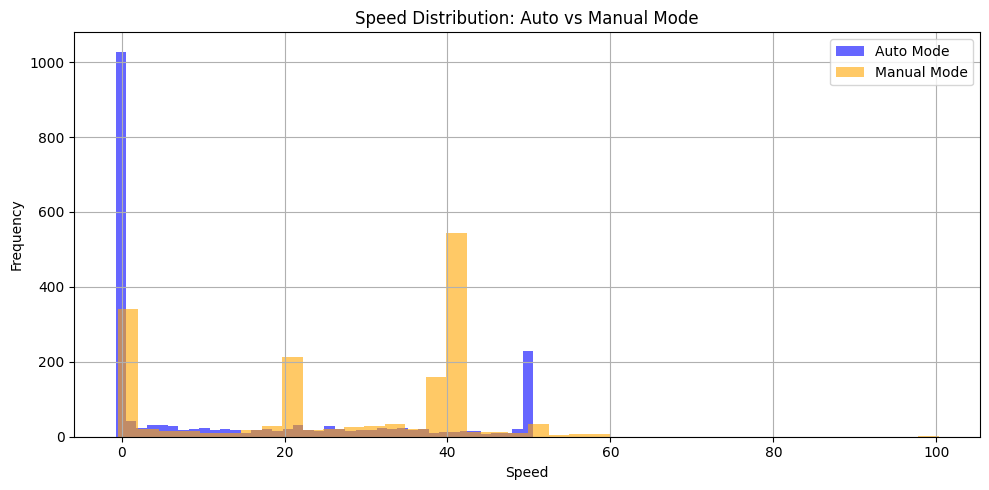

In [7]:
# 📦 Import required libraries
import pandas as pd
import matplotlib.pyplot as plt

# 🗂️ Load the CSV from your local path
file_path = r"C:\Users\User\Downloads\ER 04 gantry.csv"
df = pd.read_csv(file_path)

# 🧼 Convert and clean columns
df['Time'] = pd.to_datetime(df['Time'], errors='coerce', format='mixed')
df['Value'] = pd.to_numeric(df['Value'], errors='coerce')

# 🧪 Split into Gantry Speed and Auto Mode
df_speed = df[df['Data Source'].str.contains('TRMT_ER1040ML04_SIT')].copy()
df_auto = df[df['Data Source'].str.contains('TRMT_ER1040ML04_BM1_IS01_YIT_AUTO_MOD')].copy()

# ✏️ Rename for clarity
df_speed.rename(columns={'Value': 'Speed'}, inplace=True)
df_auto.rename(columns={'Value': 'Auto_Mode'}, inplace=True)

# 🕒 Round timestamps in speed data
df_speed['Time'] = df_speed['Time'].dt.floor('S')

# 🚫 Remove invalid gantry speeds above 105
max_valid_speed = 105
invalid_speeds = df_speed[df_speed['Speed'] > max_valid_speed]
print(f"⚠️ Found {len(invalid_speeds)} entries with Speed > {max_valid_speed}, removing them...")
invalid_speeds.to_csv(r"C:\Users\User\Downloads\ER04_InvalidSpeeds.csv", index=False)
df_speed = df_speed[df_speed['Speed'] <= max_valid_speed]

# 📊 Resample Auto Mode signal to 1-second frequency
df_auto.set_index('Time', inplace=True)
df_auto = df_auto.resample('1S').ffill()
df_auto['Auto_Mode'] = df_auto['Auto_Mode'].fillna(0).astype(int)
df_auto.reset_index(inplace=True)

# 🔗 Merge on 'Time'
merged_df = pd.merge(df_speed, df_auto, on='Time', how='left')
merged_df['Auto_Mode'] = merged_df['Auto_Mode'].fillna(method='ffill').fillna(0).astype(int)

# ✅ Split Auto Mode and Manual Mode
auto_df = merged_df[merged_df['Auto_Mode'] == 1]
manual_df = merged_df[merged_df['Auto_Mode'] == 0]

# 💾 Save to CSVs
auto_path = r"C:\Users\User\Downloads\ER04_Gantry_AutoMode.csv"
manual_path = r"C:\Users\User\Downloads\ER04_Gantry_ManualMode.csv"
merged_path = r"C:\Users\User\Downloads\ER04_Gantry_Merged.csv"

auto_df.to_csv(auto_path, index=False)
manual_df.to_csv(manual_path, index=False)
merged_df.to_csv(merged_path, index=False)

# 📊 Stats output
print("🔵 Auto Mode Speed Stats:\n", auto_df['Speed'].describe())
print("\n🟠 Manual Mode Speed Stats:\n", manual_df['Speed'].describe())

# 📈 Optional: Plot histogram comparison
plt.figure(figsize=(10, 5))
plt.hist(auto_df['Speed'], bins=40, alpha=0.6, label='Auto Mode', color='blue')
plt.hist(manual_df['Speed'], bins=40, alpha=0.6, label='Manual Mode', color='orange')
plt.title('Speed Distribution: Auto vs Manual Mode')
plt.xlabel('Speed')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_6364\572278246.py:28: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  auto_mode_df = auto_mode_df.resample('1S').ffill().fillna(0)


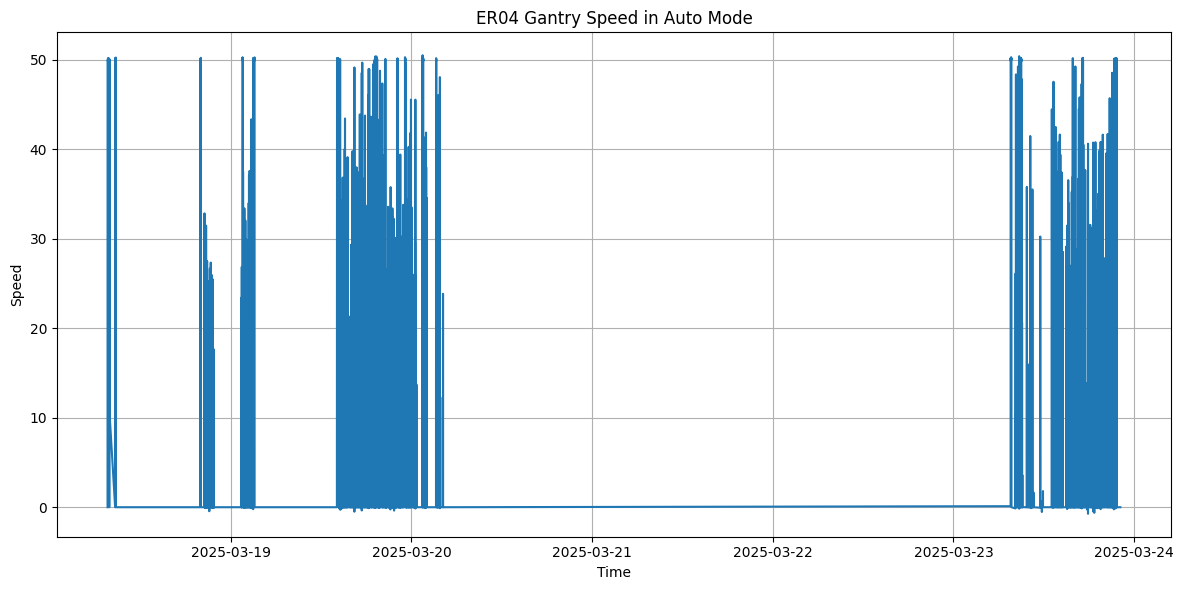

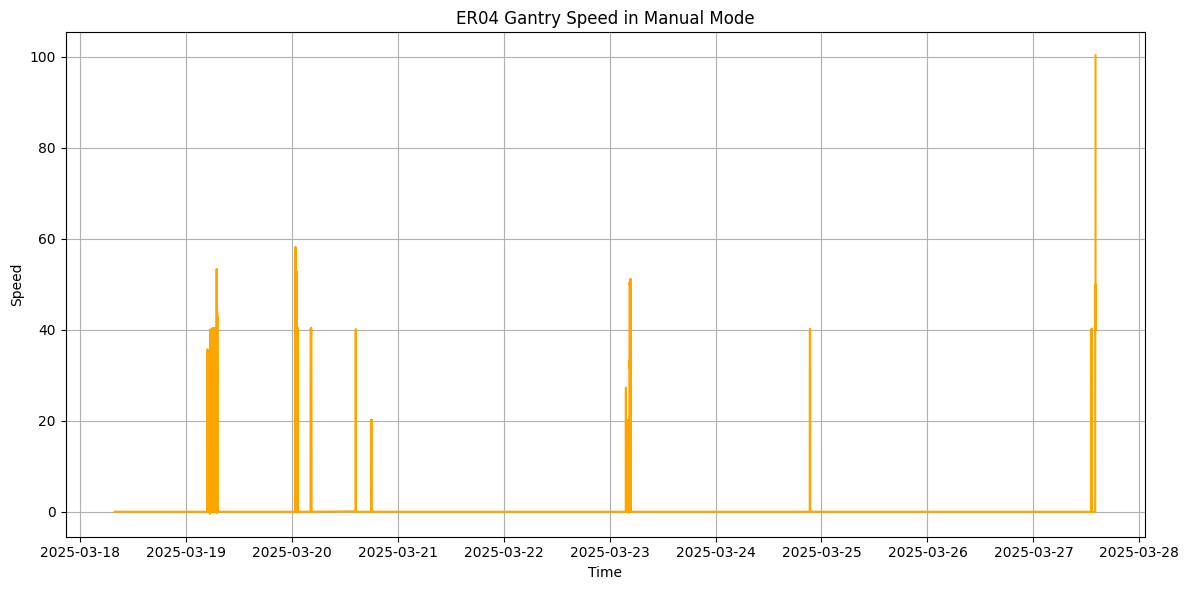

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load CSV File
file_path = "C:\\Users\\User\\Downloads\\ER 04 gantry.csv"
df = pd.read_csv(file_path)

# Step 2: Convert Data Types
df['Time'] = pd.to_datetime(df['Time'], errors='coerce')
df['Value'] = pd.to_numeric(df['Value'], errors='coerce')

# Step 3: Drop invalid rows
df.dropna(subset=['Time', 'Value'], inplace=True)

# Step 4: Split data by source
speed_df = df[df['Data Source'].str.contains('TRMT_ER1040ML04_SIT')].copy()
auto_mode_df = df[df['Data Source'].str.contains('TRMT_ER1040ML04_BM1_IS01_YIT_AUTO_MOD')].copy()

# Step 5: Rename columns for clarity
speed_df.rename(columns={'Value': 'Speed'}, inplace=True)
auto_mode_df.rename(columns={'Value': 'Auto_Mode'}, inplace=True)

# Step 6: Set time as index
speed_df.set_index('Time', inplace=True)
auto_mode_df.set_index('Time', inplace=True)

# Step 7: Resample Auto Mode data
auto_mode_df = auto_mode_df.resample('1S').ffill().fillna(0)

# Step 8: Merge on nearest timestamps
merged_df = pd.merge_asof(speed_df.sort_index(), auto_mode_df.sort_index(), left_index=True, right_index=True, direction='backward')

# Step 9: Separate Auto and Manual Mode data
auto_speed = merged_df[merged_df['Auto_Mode'] == 1]
manual_speed = merged_df[merged_df['Auto_Mode'] == 0]

# Step 10: Plot Auto Mode Speed
plt.figure(figsize=(12, 6))
plt.plot(auto_speed.index, auto_speed['Speed'], label='Speed in Auto Mode')
plt.xlabel('Time')
plt.ylabel('Speed')
plt.title('ER04 Gantry Speed in Auto Mode')
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 11: Plot Manual Mode Speed
plt.figure(figsize=(12, 6))
plt.plot(manual_speed.index, manual_speed['Speed'], color='orange', label='Speed in Manual Mode')
plt.xlabel('Time')
plt.ylabel('Speed')
plt.title('ER04 Gantry Speed in Manual Mode')
plt.grid(True)
plt.tight_layout()
plt.show()



In [11]:
pip install reportlab


Note: you may need to restart the kernel to use updated packages.


In [13]:
from reportlab.lib.pagesizes import A4
from reportlab.pdfgen import canvas
from reportlab.lib.units import inch
from datetime import datetime
import os

# Define the PDF file name
pdf_file = "ER04_Gantry_Speed_Report.pdf"

# Create a canvas object
c = canvas.Canvas(pdf_file, pagesize=A4)
width, height = A4

# Set title
c.setFont("Helvetica-Bold", 16)
c.drawCentredString(width / 2, height - 50, "ER04 Gantry Speed Analysis Report")

# Add metadata
c.setFont("Helvetica", 10)
c.drawString(50, height - 70, "Prepared by: Balakartigeyan")
c.drawString(50, height - 85, f"Date: {datetime.now().strftime('%d %B %Y')}")

# Add a line separator
c.line(50, height - 95, width - 50, height - 95)

# Add introduction
text = c.beginText(50, height - 120)
text.setFont("Helvetica", 12)
intro = [
    "Objective:",
    "This report analyzes the gantry movement of ER04 when operating in Auto and Manual Modes.",
    "The analysis focuses on speed variations, especially during stacking operations between 8000 to 10000 tons.",
    "",
    "Findings:",
    "- In Auto Mode, the gantry speed is capped around 50, aligning with the expected operational limits.",
    "- In Manual Mode, instances of speed approaching 100 were observed, indicating potential overrides.",
    "",
    "Recommendations:",
    "- Review and enforce speed limits in Manual Mode.",
    "- Implement alerts for speed thresholds to ensure safety and equipment longevity.",
]
for line in intro:
    text.textLine(line)
c.drawText(text)

# Add images
image_paths = [
    "gantry_speed_auto_mode.png",
    "gantry_speed_manual_mode.png",
    "data_coverage.png",
    "auto_mode_peaks.png",
    "manual_mode_peaks.png"
]

y_position = height - 300
for image in image_paths:
    if os.path.exists(image):
        c.drawImage(image, 50, y_position, width=500, preserveAspectRatio=True, mask='auto')
        y_position -= 250  # Adjust position for next image
        if y_position < 100:
            c.showPage()
            y_position = height - 100
    else:
        print(f"Image {image} not found. Skipping.")

# Save the PDF
c.save()
print(f"PDF report '{pdf_file}' has been created successfully.")


Image gantry_speed_auto_mode.png not found. Skipping.
Image gantry_speed_manual_mode.png not found. Skipping.
Image data_coverage.png not found. Skipping.
Image auto_mode_peaks.png not found. Skipping.
Image manual_mode_peaks.png not found. Skipping.
PDF report 'ER04_Gantry_Speed_Report.pdf' has been created successfully.


Epoch 1/20


C:\Users\User\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0518 - val_loss: 0.0090
Epoch 2/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0073 - val_loss: 0.0072
Epoch 3/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0059 - val_loss: 0.0074
Epoch 4/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0059 - val_loss: 0.0070
Epoch 5/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0053 - val_loss: 0.0069
Epoch 6/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0059 - val_loss: 0.0072
Epoch 7/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0055 - val_loss: 0.0068
Epoch 8/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0048 - val_loss: 0.0068
Epoch 9/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0053 - val_loss: 0.0067
Epoch 10/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0057 - val_loss: 0.0067
Epoch 11/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0055 - val_loss: 0.0068
Epoch 12/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0055 - val_loss: 0.0067


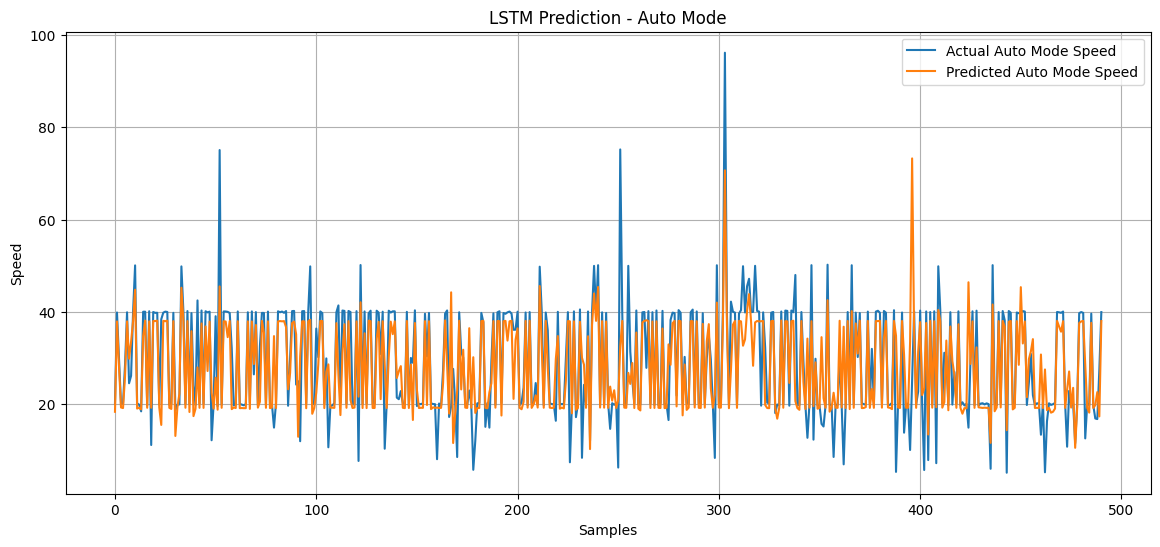

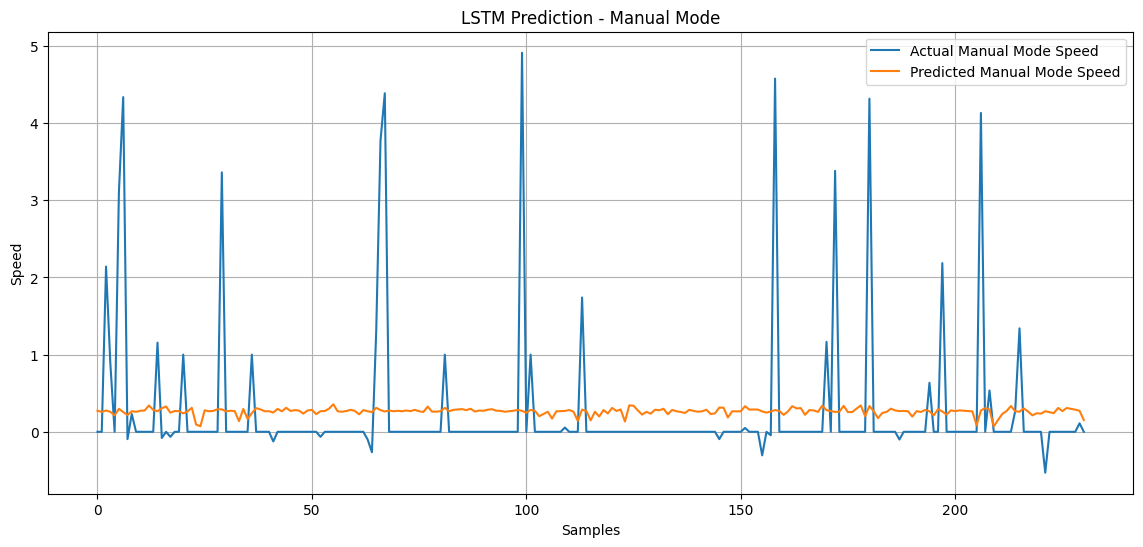

In [4]:
# ER04 Gantry LSTM Forecasting (Auto and Manual Mode)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load the dataset (Please adjust the path according to your local machine)
df = pd.read_csv(r'C:\Users\User\Downloads\ER04.csv')

# --- Data Cleaning ---
df['Time'] = pd.to_datetime(df['Time'], errors='coerce')
df['Value'] = pd.to_numeric(df['Value'], errors='coerce')
df = df.dropna(subset=['Time', 'Value'])
df = df.sort_values('Time').reset_index(drop=True)

# --- Define Auto and Manual Mode ---
threshold_speed = 5
auto_mode_df = df[df['Value'] > threshold_speed].copy()
manual_mode_df = df[df['Value'] <= threshold_speed].copy()

# --- Helper Function: Create Sequences ---
def create_sequences(data, seq_length=10):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# --- Prepare Data for LSTM ---
seq_length = 10

# Auto Mode
auto_values = auto_mode_df['Value'].values.reshape(-1, 1)
auto_scaler = MinMaxScaler()
auto_scaled = auto_scaler.fit_transform(auto_values)
X_auto, y_auto = create_sequences(auto_scaled, seq_length)
X_auto_train, X_auto_test, y_auto_train, y_auto_test = train_test_split(X_auto, y_auto, test_size=0.2, random_state=42)

# Manual Mode
manual_values = manual_mode_df['Value'].values.reshape(-1, 1)
manual_scaler = MinMaxScaler()
manual_scaled = manual_scaler.fit_transform(manual_values)
X_manual, y_manual = create_sequences(manual_scaled, seq_length)
X_manual_train, X_manual_test, y_manual_train, y_manual_test = train_test_split(X_manual, y_manual, test_size=0.2, random_state=42)

# --- Build LSTM Model Function ---
def build_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=input_shape))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

# --- Train LSTM Model for Auto Mode ---
auto_model = build_lstm_model((seq_length, 1))
auto_model.fit(X_auto_train, y_auto_train, epochs=20, batch_size=32, validation_data=(X_auto_test, y_auto_test))

# --- Train LSTM Model for Manual Mode ---
manual_model = build_lstm_model((seq_length, 1))
manual_model.fit(X_manual_train, y_manual_train, epochs=20, batch_size=32, validation_data=(X_manual_test, y_manual_test))

# --- Predict and Visualize Results ---
# Auto Mode Predictions
y_auto_pred = auto_model.predict(X_auto_test)
y_auto_pred_inv = auto_scaler.inverse_transform(y_auto_pred)
y_auto_test_inv = auto_scaler.inverse_transform(y_auto_test.reshape(-1,1))

# Manual Mode Predictions
y_manual_pred = manual_model.predict(X_manual_test)
y_manual_pred_inv = manual_scaler.inverse_transform(y_manual_pred)
y_manual_test_inv = manual_scaler.inverse_transform(y_manual_test.reshape(-1,1))

# --- Plot Results ---
plt.figure(figsize=(14,6))
plt.plot(y_auto_test_inv, label='Actual Auto Mode Speed')
plt.plot(y_auto_pred_inv, label='Predicted Auto Mode Speed')
plt.title('LSTM Prediction - Auto Mode')
plt.xlabel('Samples')
plt.ylabel('Speed')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(14,6))
plt.plot(y_manual_test_inv, label='Actual Manual Mode Speed')
plt.plot(y_manual_pred_inv, label='Predicted Manual Mode Speed')
plt.title('LSTM Prediction - Manual Mode')
plt.xlabel('Samples')
plt.ylabel('Speed')
plt.legend()
plt.grid(True)
plt.show()
